# Project 4: Predictive Analysis using scikit-learn.
## Contributors
- Omar M. Hussein
- Randy Leon
- Julian Ruggiero

# Data
The data set we will be using is the UCI Mushroom Data Set <a href="https://archive.ics.uci.edu/ml/datasets/mushroom">Data</a>. This data set includes descriptions of hypothetical samples corresponding to twenty-three species of gilled mushrooms in the Agaricus and Lepiota Family. 

Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The guide clearly states that there is no simple rule for determining the edibility of a mushroom; There is no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.


# Problem Description
Which other attribute (i.e., aside from the poisonous/edible indicator) or attributes are the best predictors of
whether a particular mushroom is poisonous or edible?


In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset dictionary and details.
 
- __Class:__ edible=e, poisonous=p (dependant variable)
- __Cap-shape:__ bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- __Cap-surface:__ fibrous=f,grooves=g,scaly=y,smooth=s
- __Cap-color:__ brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
- __Bruises?:__ bruises=t,no=f
- __Odor:__ almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
- __Gill-attachment:__ attached=a,descending=d,free=f,notched=n
- __Gill-spacing:__ close=c,crowded=w,distant=d
- __Gill-size:__ broad=b,narrow=n
- __Gill-color:__ black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
- __Stalk-shape:__ enlarging=e,tapering=t
- __Stalk-root:__ bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
- __Stalk-surface-above-ring:__ fibrous=f,scaly=y,silky=k,smooth=s
- __Stalk-surface-below-ring:__ fibrous=f,scaly=y,silky=k,smooth=s
- __Stalk-color-above-ring:__ brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- __Stalk-color-below-ring:__ brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
- __Veil-type:__ partial=p,universal=u
- __Veil-color:__ brown=n,orange=o,white=w,yellow=y
- __Ring-number:__ none=n,one=o,two=t
- __Ring-type:__ cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
- __Spore-print-color:__ black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
- __Population:__ abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
- __Habitat:__ grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Summary discovered information
- All attributes are nominally valued.
- Data columns (total 23 columns)
- There are 8124 entries, 0 to 8123.
- There are 2480 missing values denoted by '?'
##### In the following cells we will go into details of the summary.

We got the dataset was by properly formulating the url query as follows:
url = https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom + agaricus-lepiota.data
The first part is the is the name of the page itself and the second part is the specific data file.

# Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis

#### Add meaningful names for each column in the DataFrame

In [2]:
# Adding all the names
coloumn_names=['class',
               'cap-shape',
               'cap-surface',
               'cap-color',
               'bruises',
               'odor',
               'gill-attachment',
               'gill-spacing',
               'gill-size',
               'gill-color',
               'stalk-shape',
               'stalk-root',
               'stalk-surface-above-ring',
               'stalk-surface-below-ring',
               'stalk-color-above-ring',
               'stalk-color-below-ring',
              'veil-type',
              'veil-color',
              'ring-number',
              'ring-type',
              'spore-print-color',
              'population',
              'habitat']

In [3]:
# the url
url='https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
# Reading the through pandas while also applying the column names
df=pd.read_csv(url,header=None,names=coloumn_names)
# Viewing the data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

We can see that there are 8124 observations and 23 columns.

## Getting familiar with the Data
Before selecting the appropiate features for our machine learning model, we want to undertand the data better.

### Missing and Unique Values 
We will search for all the unique values in each column.

In [5]:
# Getting all the unique values for every column
pd.Series({c: df[c].unique() for c in df})

class                                                     [p, e]
cap-shape                                     [x, b, s, f, k, c]
cap-surface                                         [s, y, f, g]
cap-color                         [n, y, w, g, e, p, b, u, c, r]
bruises                                                   [t, f]
odor                                 [p, a, l, n, f, c, y, s, m]
gill-attachment                                           [f, a]
gill-spacing                                              [c, w]
gill-size                                                 [n, b]
gill-color                  [k, n, g, p, w, h, u, e, b, r, y, o]
stalk-shape                                               [e, t]
stalk-root                                       [e, c, b, r, ?]
stalk-surface-above-ring                            [s, f, k, y]
stalk-surface-below-ring                            [s, f, y, k]
stalk-color-above-ring               [w, g, p, n, b, e, o, c, y]
stalk-color-below-ring   

- All the values seem to make sense except for '?' on stalk-root, so we will replace them with NaN.
- "Veil-type" has only one category so that feature can be removed for our purpose of building a model in the next section.

In [6]:
# removing 'veil-type'
del df['veil-type']
# Replacing all the ? values with NaN
df=df.replace({'?':np.NaN})
#Print number of null of values
print(df.isna().sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


### Imputing Missing Values
For the purposes of filling the missing values in the 'stalk-root' column, we want to avoid changing the shape of the distribution, however since this is a categorical feature and not a numeric feature things might be different.

Class Distribution in %:
b    66.902906
e    19.844082
c     9.851169
r     3.401843
Name: stalk-root, dtype: float64

New Mode value: 
66.9029057406095


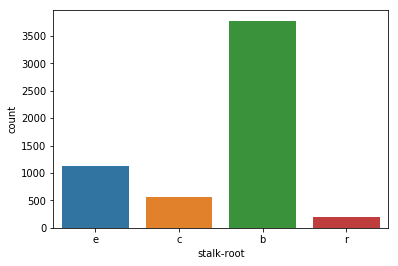

In [7]:
#Formatting original data set
print('Class Distribution in %:')
# Getting the class distribution in percentage
print(df['stalk-root'].value_counts(normalize=True)*100)
# Getting the mode
print("\nNew Mode value: ")
print((df['stalk-root'].value_counts(normalize=True)*100).max())
sns.countplot(df['stalk-root']);

The current distribution of the stalk-root shows that around 70% of the records have a 'b', followed by 'e' with nearly 20%, then 'c' and lastly 'e'. 

### Fill missing values with the mode of "stalk-root"

b    77.006401
e    13.786312
c     6.843919
r     2.363368
Name: stalk-root, dtype: float64


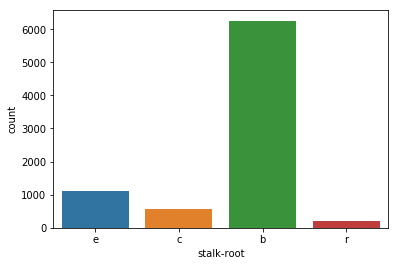

In [8]:
# Mode data set
df_modefill = df.copy()
df_modefill.loc[df_modefill['stalk-root'] == np.NaN, 'stalk-root'] = np.nan
df_modefill.fillna('b', inplace=True)
print(df_modefill['stalk-root'].value_counts(normalize=True)*100)
sns.countplot(df_modefill['stalk-root']);

### Filling missing values with backward fill

b    61.873075
c    21.959335
e    13.801602
r     2.365989
Name: stalk-root, dtype: float64


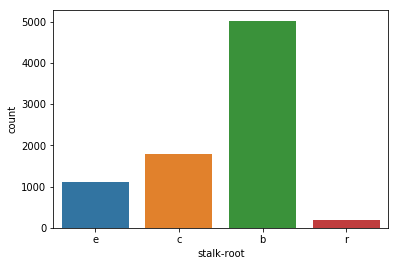

In [9]:
# Mode data set
df_bwfill = df.copy()
df_bwfill.loc[df_modefill['stalk-root'] == np.NaN, 'stalk-root'] = np.nan
df_bwfill.fillna(method='bfill', inplace=True)
print(df_bwfill['stalk-root'].value_counts(normalize=True)*100)
sns.countplot(df_bwfill['stalk-root']);

### Filling missing values with forward fill

b    64.094042
c    19.756278
e    13.786312
r     2.363368
Name: stalk-root, dtype: float64


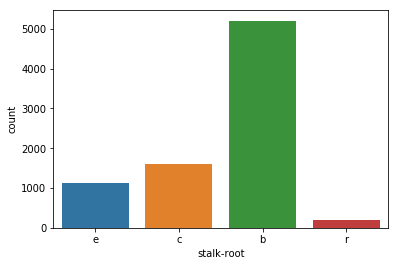

In [10]:
df_ffill = df.copy()
df_ffill.loc[df_modefill['stalk-root'] == np.NaN, 'stalk-root'] = np.nan
df_ffill.fillna(method='ffill', inplace=True)
df_ffill['stalk-root'].value_counts(normalize=True)*100
print(df_ffill['stalk-root'].value_counts(normalize=True)*100)
sns.countplot(df_ffill['stalk-root']);

# Choosing the best imputed data-set.
From above we can clearly see that the datasets in which we filled the missing values using mode and forward fill are the ones that preserve the shape of the distribution the most. 

However, there seems to be an evident problem with the mode method as it allocates all the values to one category. This could potentially lead to a form of bias towards that class especially considering the amount of missing values that were filled. That leaves us with the dataset that was imputed using the forward fill method which is what we are going to use from henceforth.

## Encoding the variables for df_ffill.
- df_ffill is the one that preserved the shape the most, henceforth it will be used for the remainder of our project.

- We will here proceed to replace the categorical variables with encoded variables instead for each of our newly created dataframes for the purpose of applying correlation and chi-squared analysis.

- To be able to fill with numerical values in our categorical features, we will use the __fit_transform__ method provided by the __LabelEncoder__ library within __sklearn.__

In [11]:
# importing library
from sklearn.preprocessing import LabelEncoder

# Before we encode, let's save a copy for it for later use
df_ffill2=df_ffill.copy()

# Using decoder and a loop to transform letters to numbers in each column
labelencoder=LabelEncoder()
for column in df_ffill.columns:
    df_ffill[column] = labelencoder.fit_transform(df_ffill[column])
df_ffill.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


We now have numbers instead of letters in our entire dataset, and without null values.

# Feature Selection & EDA

## Feature Selection
Here, we are trying to look at what we should expect from the variables to develop an understanding on which ones are potentially useful and which are potentially not for our model.

## Heatmap
We will plot a heatmap to see the correlation between variables.

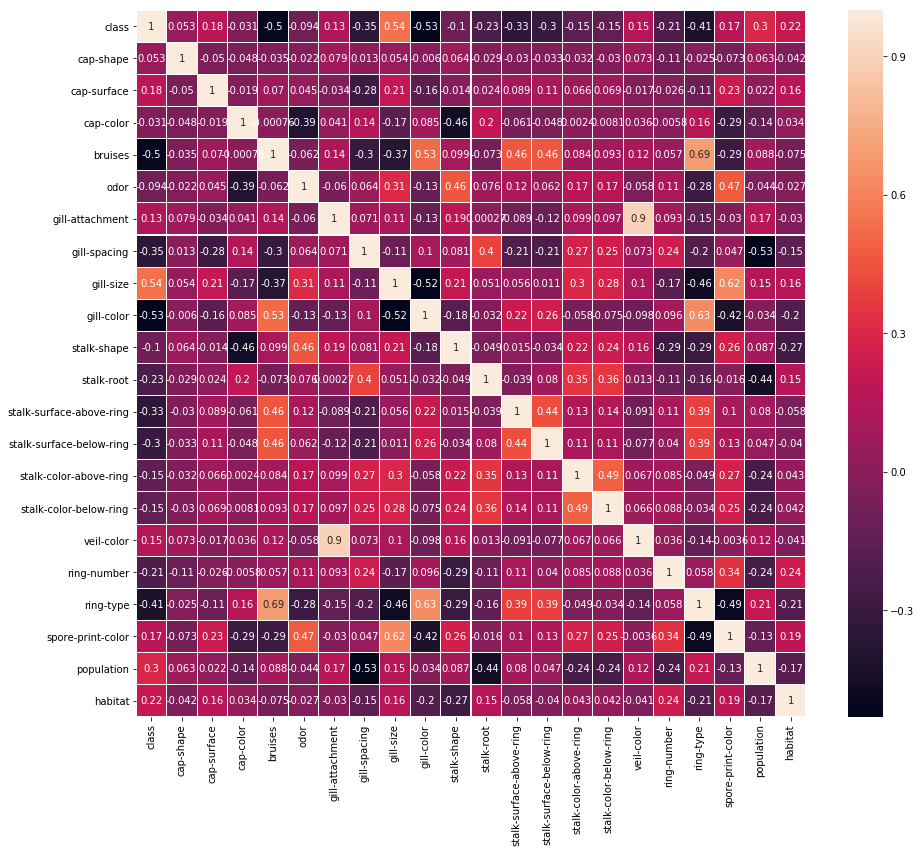

In [12]:
# Defining map size and creating correlation matrix
plt.figure(figsize=(15,13));
sns.heatmap(df_ffill.corr(),linewidths=.1, annot=True);
plt.yticks(rotation=0);

We can see that there are some features with high positive correlation with the 'class' attribute, and some of them include: bruises, gill-spacing, gill-color, stalk-surface-above-ring, stalk-surface-below-ring, ring-type, among others.  

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

Note: Odor has the least correlated value accross the board so it is statistically significant because it is unique.
To make a final decision on the right attributes for our model we will proceed with another method, the chi-squared.

## Chi-Squared
In order to choose which values are the most important for identifying the class, we can get the chi-squared (chi²) statistical test for non-negative features to select 5 of the best features in the dataset.

In [13]:
# Libraries
from sklearn.feature_selection import chi2, SelectKBest

                    Features  Chi2_statics       p_values
0                 gill-color   5957.764469   0.000000e+00
1                  ring-type   1950.610146   0.000000e+00
2                  gill-size   1636.606833   0.000000e+00
3                    bruises   1194.277352  1.069037e-261
4               gill-spacing    826.795274  8.061293e-182
5                    habitat    751.309489  2.082916e-165
6                 stalk-root    530.247409  2.495306e-117
7          spore-print-color    379.132729   1.922119e-84
8                 population    311.766736   9.002366e-70
9   stalk-surface-above-ring    222.982400   2.022392e-50
10               cap-surface    214.068544   1.779362e-48
11  stalk-surface-below-ring    206.648180   7.398869e-47
12    stalk-color-above-ring    119.792216   7.024638e-28
13    stalk-color-below-ring    109.789410   1.089740e-25
14                      odor     75.910163   2.968682e-18
15               stalk-shape     36.594105   1.454709e-09
16            

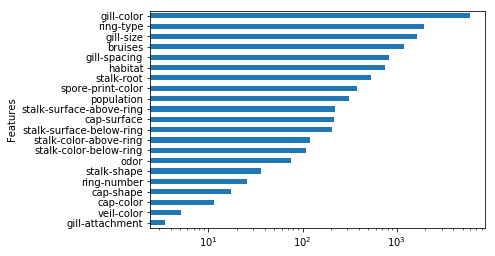

In [14]:
# Getting the chi-square
chi, p_values = chi2(df_ffill.iloc[:,1:], df_ffill['class'])

#get the class as the feature column
feature_columns = df_ffill.columns[1:]
chi2_result = pd.DataFrame({'Features': feature_columns, 'Chi2_statics': chi, 'p_values': p_values})
print(chi2_result.sort_values(by='Chi2_statics', ascending=False)
      [['Features', 'Chi2_statics', 'p_values']].reset_index().drop('index', axis=1))
print("\n\n \t\t Feature Importance sorted by Chi-Squared value")
chi2_result.sort_values(by='Chi2_statics', ascending=True).set_index('Features')['Chi2_statics'].plot(kind='barh', logx=True);

We can use the results from the chi-squared test to get the top 5 features that have the strongest relationship with the output variable.

# Reduced Data Frame

## Slicing the features

According to the analysis made in the EDA, we are in a good position to choose the top five features from the chi-squared results. (plus odor even though it ranks relatively low on the chi-squared analysis it is still statistically significant)

- Gill-color
- ring-type
- gill-size
- bruises
- gill-spacing
- odor

In [15]:
#Getting the top 5 values
new_features = chi2_result.sort_values(by='Chi2_statics', ascending=False)['Features'].head(5).values

#Apending 'odor'
new_features = np.append(new_features,['odor'])
new_features

array(['gill-color', 'ring-type', 'gill-size', 'bruises', 'gill-spacing',
       'odor'], dtype=object)

### Viewing the dimension

In [16]:
# Independent values
print("Independent values:")
print(df_ffill[new_features].shape)
# Dependant value
print("\n")
print("Dependent values:")
print(df_ffill['class'].shape)

Independent values:
(8124, 6)


Dependent values:
(8124,)


## Getting the dummies and formatting
- Creating a loop and getting the dummy values for each feature, whilst also formatting it for legibility.
- Attaching the encoded class file to it as the last column indicating that it is the dependant label that should be predicted.

In [17]:
#create a copy of the original dataframe
rdf = pd.DataFrame()

#create a loop to get dummy columns for each different value in our 6 columns
for f in new_features:
    dummies = df_ffill2[f].str.get_dummies()
    dummies.columns = ['{}_{}'.format(f, v) for v in dummies.columns]
    rdf = pd.concat([rdf, dummies], axis=1)
    
#append the 'class' to our new dataframe
rdf['class']=df_ffill['class']
rdf.head()

,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,...,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,class
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## EDA on selected features

We want to see the distribution of each of the features selected, so we will create a violin plot to see the distribution of each feature along the class of the mushroom. We will also create different bar plots for each one of them, along with the 'class' as a hue parameter, to see how much is the difference for each of the values within the attributes.

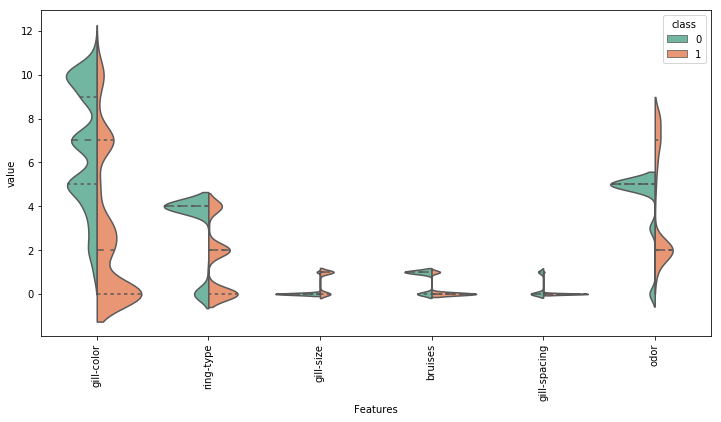

In [18]:
new_df=df_ffill[['gill-color', 'ring-type', 'gill-size', 'bruises', 'gill-spacing','odor','class']]
df_ffill_div = pd.melt(new_df, "class", var_name="Features")
fig, ax = plt.subplots(figsize=(12,6))
p = sns.violinplot(ax = ax, x="Features", y="value", hue="class", split = True, data=df_ffill_div, inner = 'quartile', palette = 'Set2')
df_ffill_no_class = new_df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_ffill_no_class.columns));

1 : gill-color


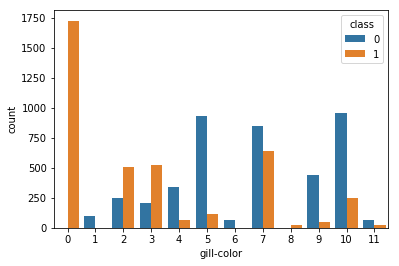

2 : ring-type


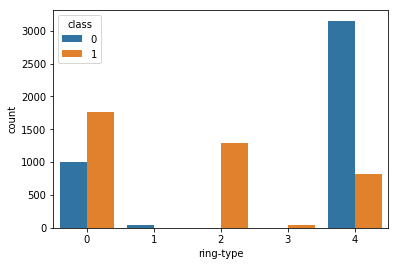

3 : gill-size


<Figure size 432x288 with 0 Axes>

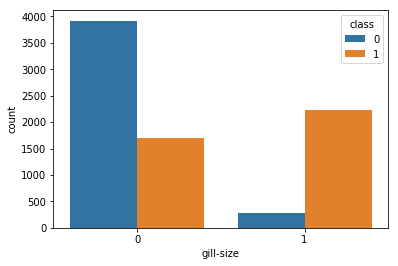

4 : bruises


<Figure size 432x288 with 0 Axes>

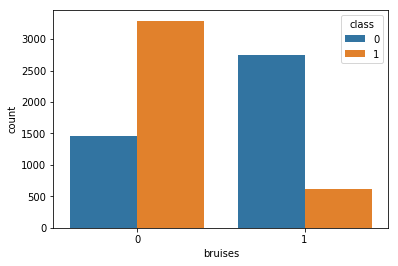

5 : gill-spacing


<Figure size 432x288 with 0 Axes>

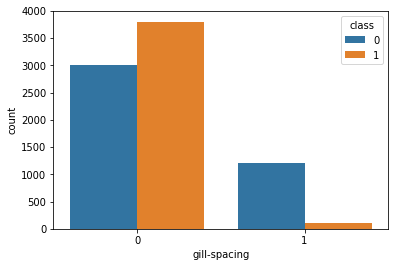

6 : odor


<Figure size 432x288 with 0 Axes>

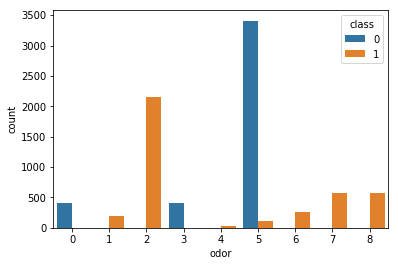

<Figure size 432x288 with 0 Axes>

In [19]:
# Performing some EDA on the specific columns we choose
feature_columns = df_ffill[['gill-color', 'ring-type', 'gill-size', 'bruises', 'gill-spacing','odor']]
for i, col in enumerate(feature_columns):
    print(i+1,":",col)
    plt.figure(i)
    sns.countplot(x=col, hue="class", data=df_ffill);
    plt.show();
    plt.clf();

The graphs above show some interesting insights:
 - Gill-color shows signifficant ammount of poisoness cases below 4, specially at zero.
 - Ring-type seems to a higher frequency of edible observations around the value 4.
 - Gill-size, bruises and gill-spacing show opposite results for each of its values.
 - The frequency for odor values looks to be distributed in peaks of frequencys around its several values. 

From the Chi-Squared and the graphs we can see that __Gill-color__ seems to be the more divisive feature.

There is a clear distinction between the poisonous and edible mushrooms within it, especially after the infliction value of approximately 3.5. Also, habitat to also be amongst the more divisive features. 

To verify our theory we did some research and acquired some domain knowledge.

https://www.wikihow.com/Identify-Edible-Mushrooms

Choose mushrooms without white gills, provided by Gill-color column.

Now, we want to check if the 'class' attribute is balanced, which is usually preferred for several reasons, including:
- The test will have larger statistical power.
- The test statistic is less susceptible to small departures from the assumption of equal variances (homoscedasticity).

Class Distribution in %:
0    51.797144
1    48.202856
Name: class, dtype: float64


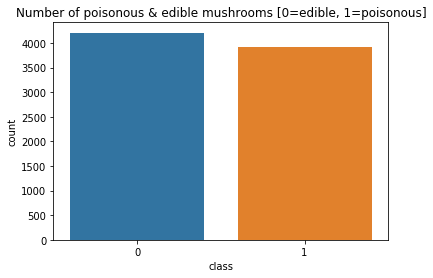

In [20]:
# Formatting note that poisonous is denoted as 1 and edible is denoted as zero
print('Class Distribution in %:')
# Getting the class distribution in percentage
print(df_ffill['class'].value_counts(normalize=True)*100)
sns.countplot(df_ffill['class']);
plt.title('Number of poisonous & edible mushrooms [0=edible, 1=poisonous]');

We can see that the 'class' attribute is well balanced, with edible of 51.79% and toxicity of 48.20%. We can now proceed with phase II to create our machine learning model with Sklearn to predict.

We will use all 5 attributes that were previously chosen in conjunction with the odor attribute leading to a total of six attributes to build a model in phase II.

# Phase II: Sklearn

Some of the work related to phase II with sklearn has been done, related to finding the best predictors . Now we will build a model using a Multi-layer perceptron and then test its accuracy as well as its precision.

## Libraries

In [21]:
# Importing the libraries
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,precision_score,classification_report,accuracy_score,classification_report,roc_curve,precision_recall_curve

## Classification

In [22]:
# Splitting the data into two parts and converting them into numpy arrays using .values
X,y= rdf.iloc[:, :-1].values,rdf.iloc[:, -1].values
print(X)
print(y)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
[1 0 0 ... 0 1 0]


In [23]:
# Showing the independent variables
print("Independent variables")
print(X.shape)
# Showing the dependant variable
print("Dependent variables")
y.shape

Independent variables
(8124, 32)
Dependent variables


(8124,)

## Splitting the data
We are  going to take 20% of the data as a test set. The remaining 80% is going to be for training purposes.

In [24]:
# Definig the training and testing set for both, the dependant and independant variable.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2, stratify=y)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (6499, 32)
Training target vector size: (6499,)
Test feature matrix size: (1625, 32)
Test target vector size: (1625,)


# Machine learning Model
Creating a Multilayer perceptron (Artificial Neural Network) classifier, then creating define a hyper-parameter space to search. (All the values that we want to try out.)

## Grid Search
- The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, the following param_grid, and we will use this to tune the Multilayer perceptron to the best of our abilities.

- Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel, and Gamma for Support Vector Classifier, alpha for Lasso, etc and in many ways they are what makes the model unique to a problem, in the following section we will discuss the parameters in depth.

- Choosing the number of layers was an empirical method and the number of layers were chosen at random however it appears that for that specific data set networks between 2 or 3 hidden layers seem to perform the best.



In [25]:
#neural network
NeuralNet=MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(26,23),(8,8,8,8),(8,8,8,8,4),(27,24),(24,10,2),(31,31),(30,30), (50,50),(22,22,22),(17,42),(25,22),(19,18)],
    'activation': ['logistic','relu','identity'],
    'solver': ['adam','lbfgs','sgd'],
    'alpha': [0.0001,0.05],
    'learning_rate': ['constant'],
}

# Hyper-parameters 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">Scikit learn documentation</a>
### hidden_layer_sizes
The ith element represents the number of neurons in the ith hidden layer.

### activation function
Activation function for the hidden layer.

‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x

‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

'relu', the rectified linear unit function, returns f(x) = max(0, x)

### solver
The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

‘sgd’ refers to stochastic gradient descent.

‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba


### alpha: float, optional, default 0.0001
L2 penalty (regularization term) parameter.

batch_sizeint, optional, default ‘auto’
Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

### learning_rate

Learning rate schedule for weight updates.

‘constant’ is a constant learning rate given by ‘learning_rate_init’.



In [26]:
# Grid Search
clf = GridSearchCV(NeuralNet, parameter_space, n_jobs=-1, cv=3)
# Fitting the the classifier
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(26, 23), (8, 8, 8, 8), (8, 8, 8, 8, 4), (27, 24), (24, 10, 2), (31, 31), (30, 30), (50, 50), (22, 22, 22), (17, 42), (25, 22), (19, 18)], 'activation': ['logistic', 'relu', 'identity'], 'solver': ['adam', 'lbfgs', 'sgd'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
# Best parameters found
print('Best parameters found:\n', clf.best_params_)
print('\n')
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
print('\nAll the paremeter combination')
# Printing all the possible combinations
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (26, 23), 'learning_rate': 'constant', 'solver': 'lbfgs'}



All the paremeter combination
0.990 (+/-0.003) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (26, 23), 'learning_rate': 'constant', 'solver': 'adam'}
0.996 (+/-0.004) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (26, 23), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.518 (+/-0.000) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (26, 23), 'learning_rate': 'constant', 'solver': 'sgd'}
0.992 (+/-0.003) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 8, 8, 8), 'learning_rate': 'constant', 'solver': 'adam'}
0.518 (+/-0.000) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 8, 8, 8), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.518 (+/-0.000) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (8,

## Evaluation Metrics


- In an ideal scenario, we would be able classify the mushrooms with a hundered percent accuracy and that is what we are going to attempt to do, however creating a classifier that classifies with a 100 percent accuracy is rarely the case.

- The metrics that we are going to give precendence over all the other metrics are precision and accuracy. For a classification problem such as this, it is important to be very precise.

# Evaluation Report for Training data
- Now you can use the clf to make new predictions. For example, check the performance on your training set

In [49]:
#Training Data dataframe and results
y_true, y_pred = y_train , clf.predict(X_train)
print('The results report on the training set:')
acc1=accuracy_score(y_true, y_pred)
precision1 = precision_score(y_true, y_pred)
recall1 = recall_score(y_true, y_pred)
evalreporttraining = [acc1, precision1, recall1]
scoresdftraining = pd.DataFrame(evalreporttraining, columns = ['score'], index =['accuracytraining',
                                                                                 'precisiontraining',
                                                                                 'recalltraining']) 
scoresdftraining


The results report on the training set:


,score
accuracytraining,0.996307
precisiontraining,1.000000
recalltraining,0.992340


[0.9963071241729496, 1.0, 0.992339610596872]


,score
accuracytraining,0.996307
precisiontraining,1.000000
recalltraining,0.992340


- From the __accuracy__ we understand that how often was the classifier correct on the test dataset which is 99.6% of the time.
- From the __percision__ we understand that it predicts a mushroom as poisonious correctly a 100% of the time on the test dataset.
- From the __recall__ we understand the sensitivity of the classifier for detecting the positive instances at 99.2% of the time on the test dataset, which is essential for a problem such as this one.

## Evaluation Report for Test data
Now you can use the clf to make new predictions. For example, check the performance on your training and test sets.

In [51]:
# Test Data Dataframe and results
print("Test data report")
y_true, y_pred = y_test , clf.predict(X_test)
acc2 = (accuracy_score(y_true, y_pred))
precision2 = (precision_score(y_true, y_pred))
recall2 = (recall_score(y_true, y_pred))
evalreporttest = [acc2, precision2, recall2]
scoresdftraining = pd.DataFrame(evalreporttest, columns = ['score'], index =['accuracytest',
                                                                             'precisiontest',
                                                                             'recalltest']) 
scoresdftraining

Test data report


,score
accuracytest,0.997538
precisiontest,1.000000
recalltest,0.994891


- From the __accuracy__ we understand that how often was the classifier correct on the test dataset which is 99.7% of the time.
- From the __percision__ we understand that it predicts a mushroom as poisonious correctly a 100% of the time on the test dataset.
- From the __recall__ we understand the sensitivity of the classifier for detecting the positive instances at 99.4% of the time on the test dataset, which is essential for a problem such as this one.

## Confusion Matrix

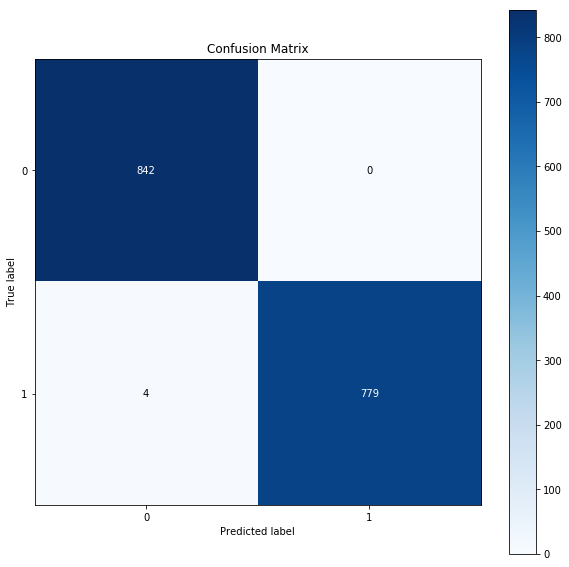

In [52]:
#! pip install -q scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true, y_pred,figsize=(10,10));

In [45]:

print(evalreporttest)

[0.9975384615384615, 1.0, 0.9948914431673053]


,score
accuracytest,0.997538
precisiontest,1.000000
recalltest,0.994891


- From the confusion matrix we conclude that the classifier generalized extremely well on unseen data, however, misclassified four poisonous mushrooms as edible which means there can still be improvements to be made because that means our model is still not impervious; it needs to be more descriptive of what a poisonous mushroom is. Perhaps larger data sets and more tests can further strengthen our algorithm.

## Example of an observations classification
Here we show an example of classifying one mushroom

In [53]:
# Independent
obs=rdf.iloc[0,:-1].values
print(obs)
print(obs.reshape(1,-1))
# Predicted value
clf.predict(obs.reshape(1,-1))

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0]
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0]]


array([1])

## Summary of steps involved in project.

- Imported and studied our data.
- Described our problem/goal we wanted to achieve.
- Prepared our data for analysis (cleaning it up) by adding and understanding meaning of values.
- Moved on to feature selection where a heatmap and a violin model helped us see correlations between values of edibility/toxicity as well as a chi-squared analysis.
- The next step was building a predictive machine learning model using a neural network classifier that relied on hyper parameters.
- Our cleaned and sorted dataset was then split up 80/20 for training then testing the ML model.
- Lastly, reviewed the accuracy, precision and recall scores of said ML model and felt them to work very well.

# Conclusion

We learned that there could be challenges involved in selecting the appropriate features to create a model that generalizes well. There are tools like the correlation matrix and chi-squared (chi²) that provide useful hints to make the right choice. Our machine learning algorithm allowed us to achieve a 99.7% of accuracy but there are still 4 cases where the model misclassified the mushroom, so the guidelines below could allow achieving a better model.

Perhaps it would be better if we get features that are more expressive of whether or not they are edible and not whether or not they are poisonous and maybe then we will get a 100% accuracy.

## Potential Improvements
There are many different steps that could be tried in order to improve the model:

- Removing/adding features with a different approach such as Wrapper Methods, Embedded Methods, normalize/standardize our data, etc).
- Attempting different models, one approach we could take is to try out a variety of classifiers until we can find the best plot.

# References used for learning purposes

- https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

- https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

- https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa

- https://www.statisticshowto.datasciencecentral.com/balanced-and-unbalanced-designs/

- http://deeplearning.net/tutorial/mlp.html

- https://scikit-learn.org/stable/modules/grid_search.html

- https://machinelearningmastery.com/an-introduction-to-feature-selection/

- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html